In [1]:
import numpy

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils

In [3]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

In [4]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [5]:
from keras import backend as K

In [6]:
K.set_image_dim_ordering('th')

In [7]:
? K.set_image_dim_ordering()

In [8]:
seed = 7
numpy.random.seed(seed)

#### loading the data

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


In [10]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
X_train.shape, X_train.ndim, X_train.dtype

((60000, 28, 28), 3, dtype('uint8'))

In [14]:
len(X_train[59999])

28

In [18]:
len(X_train[59999][27])

28

In [29]:
X_train[59999][27][27]

0

In [30]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')

In [31]:
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [32]:
X_train.shape, X_train.ndim, X_train.dtype

((60000, 1, 28, 28), 4, dtype('float32'))

In [38]:
X_train[59999][0][1][1]

0.0

In [39]:
X_train = X_train/ 255
X_test = X_test/ 255

In [40]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [41]:
y_train.shape, y_train.ndim, y_train.dtype

((60000,), 1, dtype('uint8'))

In [43]:
y_train[6]

1

In [44]:
y_train = np_utils.to_categorical(y_train)

In [45]:
y_test = np_utils.to_categorical(y_test)

In [46]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [47]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
num_classes = y_test.shape[1]

In [49]:
num_classes

10

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(30, (5,5), input_shape=(1, 28, 28), activation='relu'))

In [52]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [53]:
model.add(Conv2D(15, (3,3), activation='relu'))

In [54]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [55]:
model.add(Dropout(0.2))

In [56]:
model.add(Flatten())

In [57]:
model.add(Dense(128, activation='relu'))

In [58]:
model.add(Dense(50, activation='relu'))

In [59]:
model.add(Dense(num_classes, activation='softmax'))

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________

In [64]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 406s 7ms/step - loss: 0.1704 - acc: 0.9482 - val_loss: 0.0738 - val_acc: 0.9765


In [73]:
X_train[0:9]

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]

In [74]:
model.predict_classes(X_train[0:9])

array([5, 0, 4, 1, 9, 2, 1, 3, 1])

In [103]:
(X_train, _), _ = mnist.load_data()

In [105]:
X_train.shape

(60000, 28, 28)

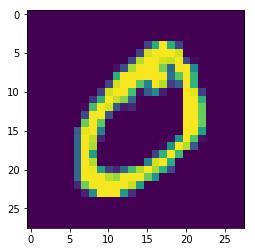

In [107]:
plt.imshow(X_train[1])

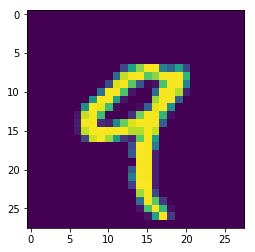

In [108]:
plt.imshow(X_train[4])

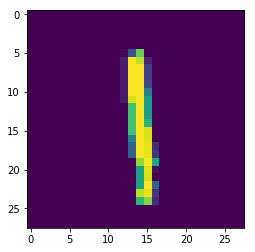

In [109]:
plt.imshow(X_train[8])